In [26]:
import os
import glob
import spacy
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
from collections import Counter

## Data Loading

In [ ]:
# load spacy model
nlp = spacy.load("en_core_web_lg")

def load_data(base_dir):
    data = []
    labels = []
    
    for label in ['positive', 'negative']:
        for filepath in glob.glob(os.path.join(base_dir, label, '*.txt')):
            with open(filepath, 'r', encoding='utf-8') as file:
                data.append(file.read())
                labels.append(1 if label == 'positive' else 0)
                
    return data, labels

train_data, train_labels = load_data('data/train')

# function for preprocessing text with spaCy
def preprocess_texts(texts):
    docs = [nlp(text) for text in texts]
    return docs

# preprocess the training data
docs = preprocess_texts(train_data)

# separate positive and negative documents
positive_docs = [doc for doc, label in zip(docs, train_labels) if label == 1]
negative_docs = [doc for doc, label in zip(docs, train_labels) if label == 0]


## Length Analysis

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


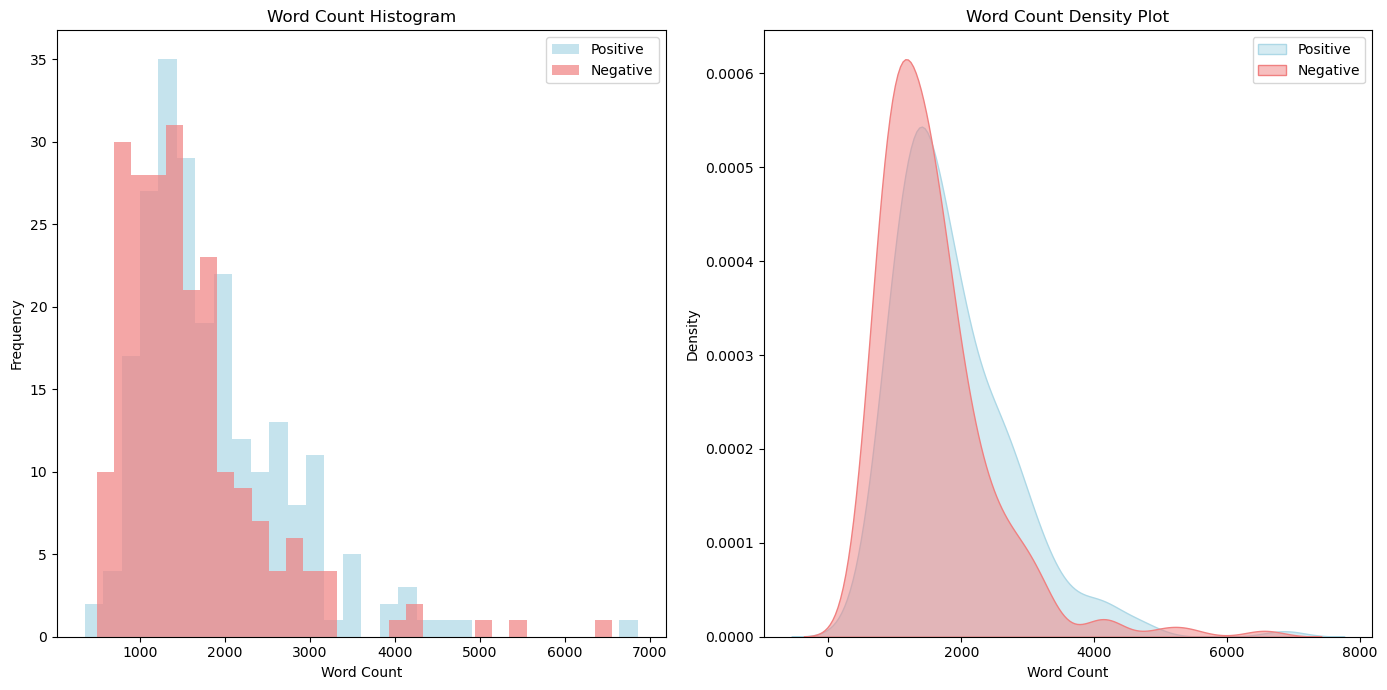

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


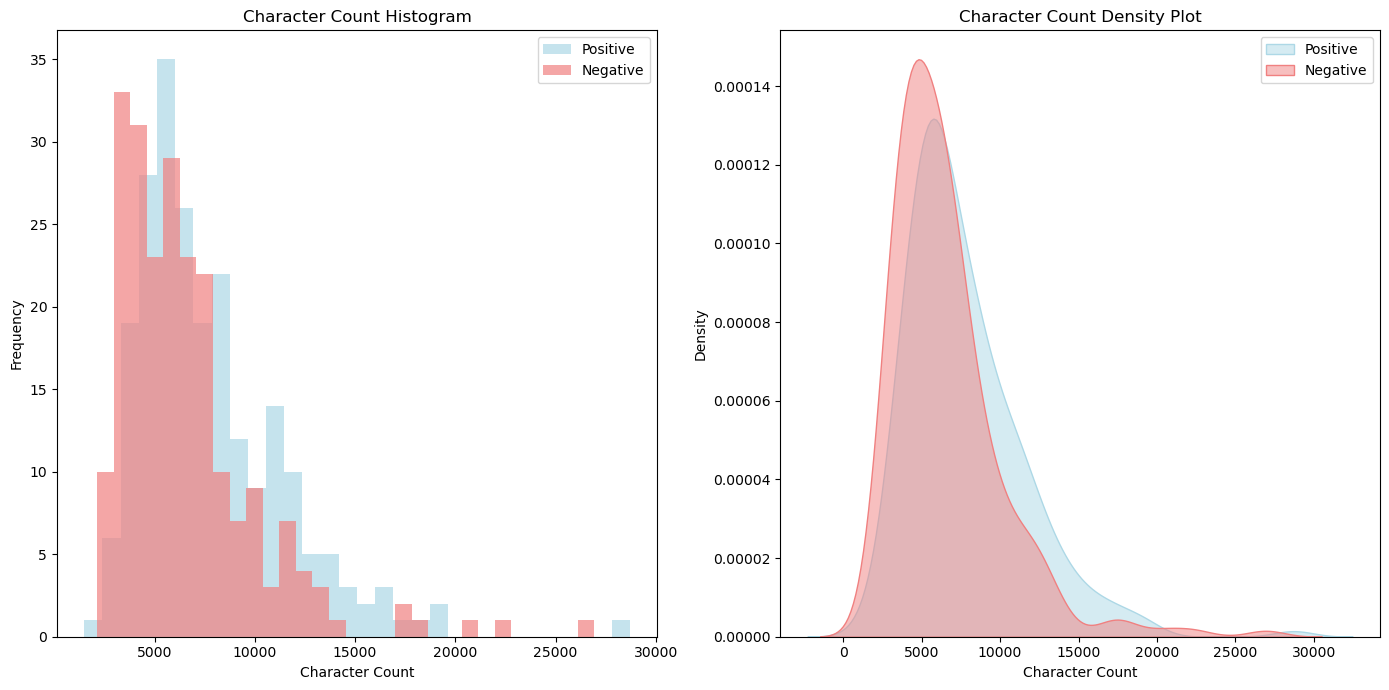

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


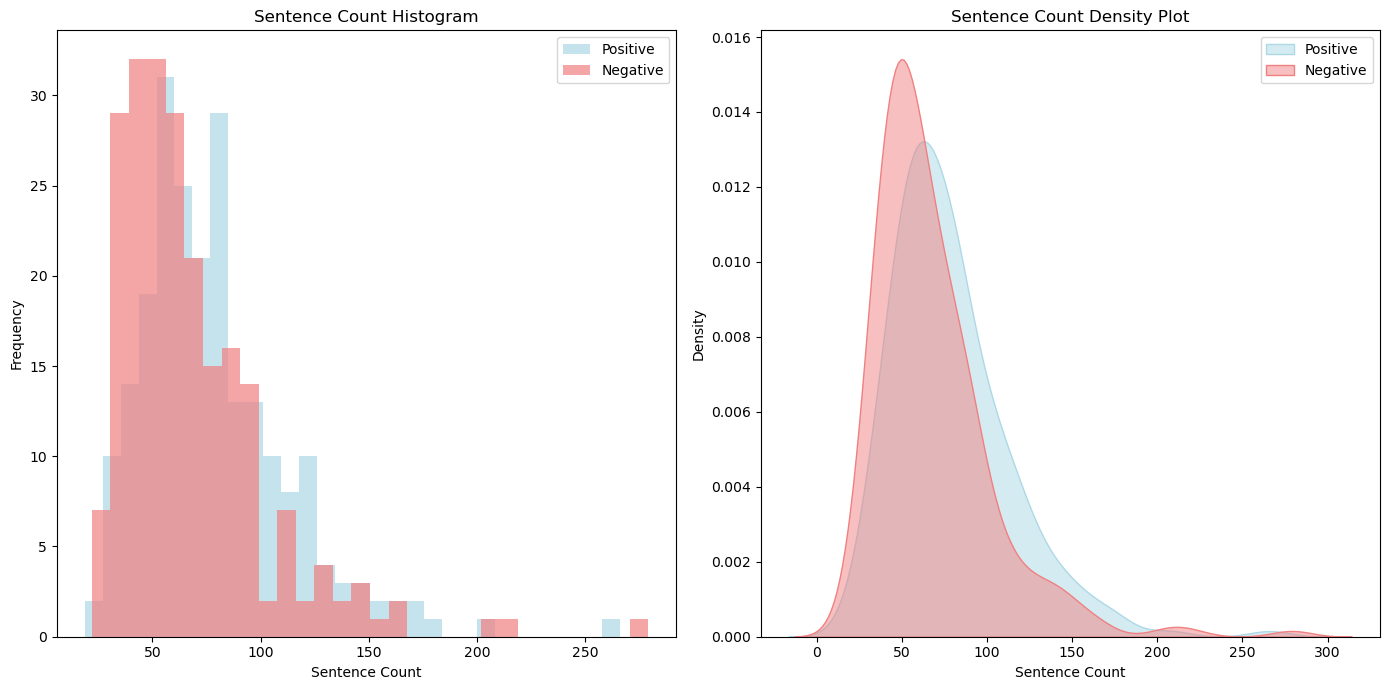

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


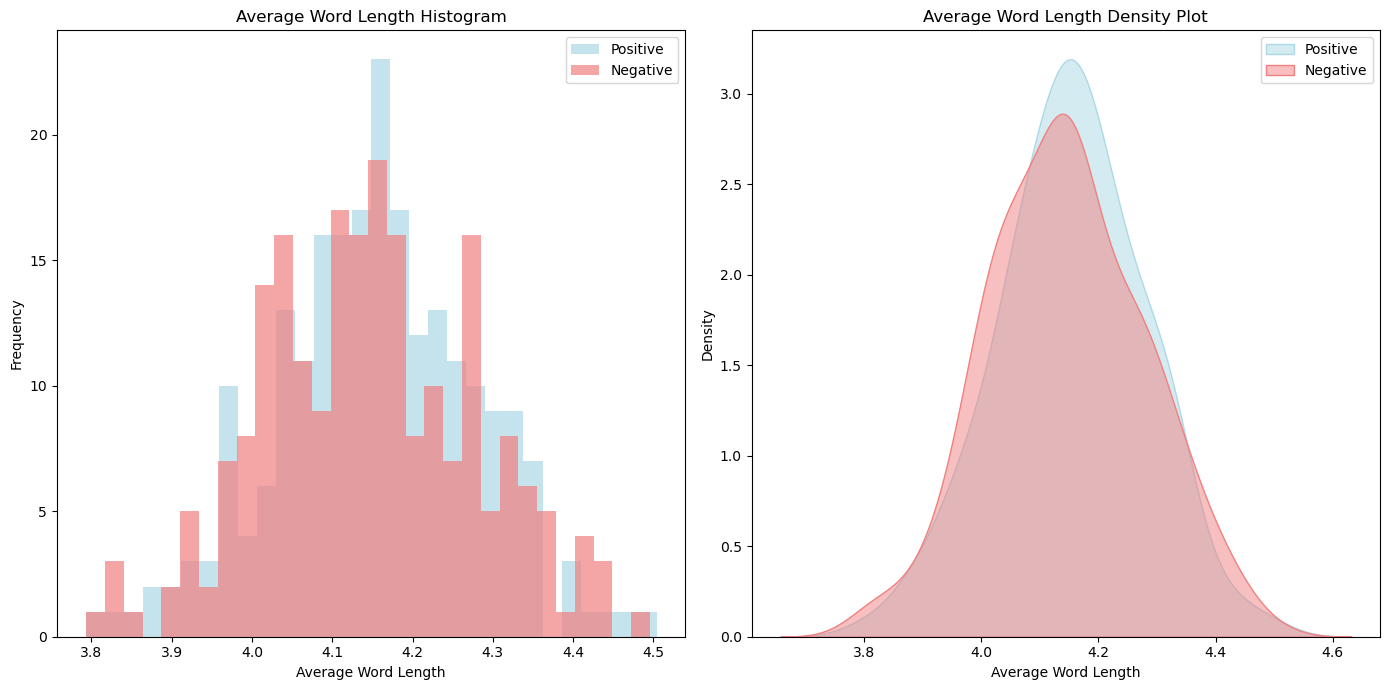

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


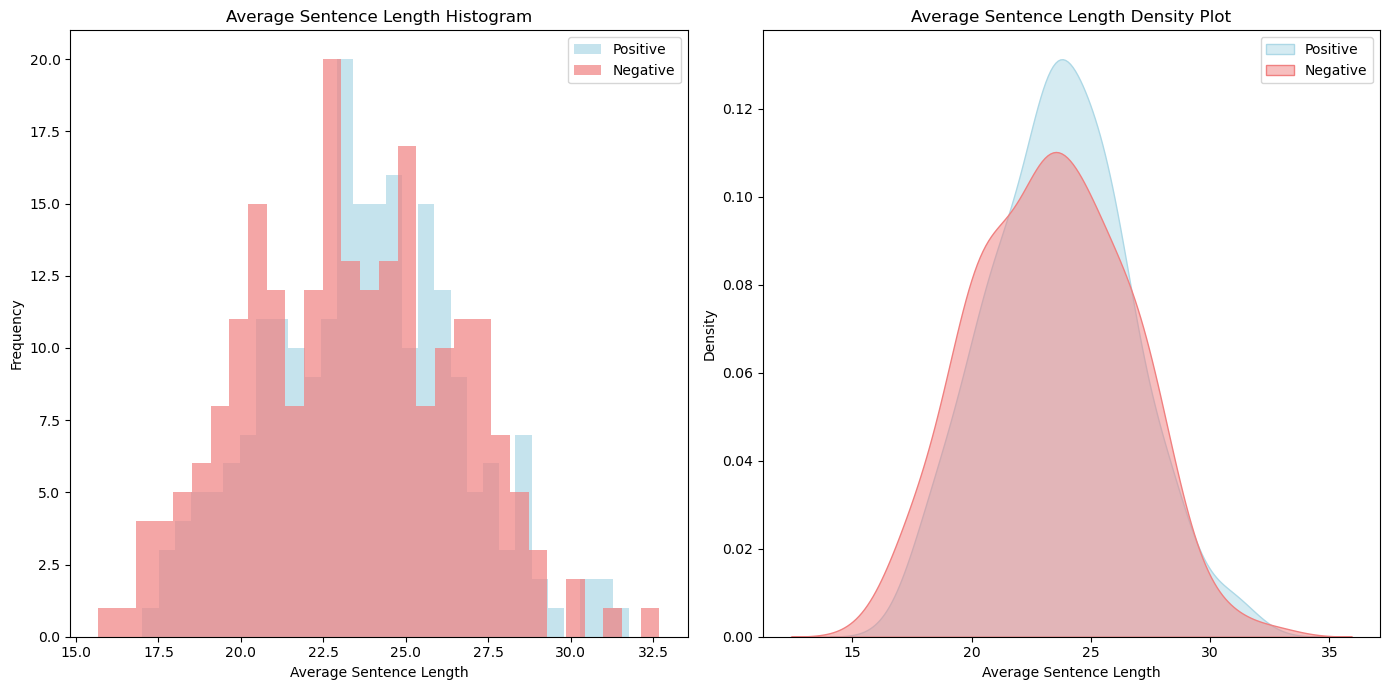

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


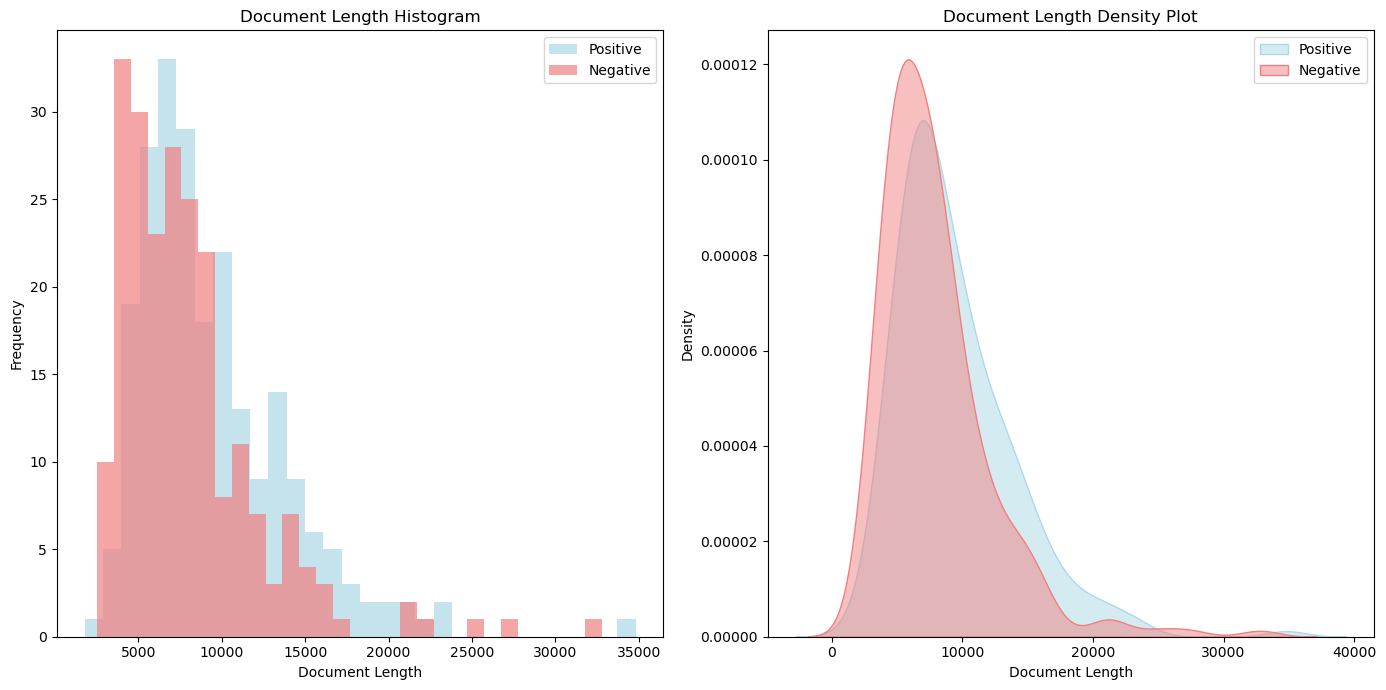

In [31]:
# function to calculate the metrics
def calculate_metrics(docs):
    word_counts = [len(doc) for doc in docs]
    char_counts = [sum(len(token) for token in doc) for doc in docs]
    sentence_counts = [len(list(doc.sents)) for doc in docs]
    avg_word_lengths = [char_count / word_count if word_count != 0 else 0 for char_count, word_count in zip(char_counts, word_counts)]
    avg_sentence_lengths = [word_count / sent_count if sent_count != 0 else 0 for word_count, sent_count in zip(word_counts, sentence_counts)]
    doc_lengths = [len(doc.text) for doc in docs]  
    
    return word_counts, char_counts, sentence_counts, avg_word_lengths, avg_sentence_lengths, doc_lengths

# calculate metrics for positive and negative documents
pos_word_counts, pos_char_counts, pos_sentence_counts, pos_avg_word_lengths, pos_avg_sentence_lengths, pos_doc_lengths = calculate_metrics(positive_docs)
neg_word_counts, neg_char_counts, neg_sentence_counts, neg_avg_word_lengths, neg_avg_sentence_lengths, neg_doc_lengths = calculate_metrics(negative_docs)

# function to plot the metrics
def plot_metrics(pos_metrics, neg_metrics, metric_name):
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    
    # histogram
    axs[0].hist(pos_metrics, bins=30, alpha=0.7, color='lightblue', label='Positive')
    axs[0].hist(neg_metrics, bins=30, alpha=0.7, color='lightcoral', label='Negative')
    axs[0].set_title(f'{metric_name} Histogram')
    axs[0].set_xlabel(metric_name)
    axs[0].set_ylabel('Frequency')
    axs[0].legend(loc='upper right')
    
    # density Plot
    sns.kdeplot(pos_metrics, ax=axs[1], color='lightblue', label='Positive', fill=True, alpha=0.5)
    sns.kdeplot(neg_metrics, ax=axs[1], color='lightcoral', label='Negative', fill=True, alpha=0.5)
    axs[1].set_title(f'{metric_name} Density Plot')
    axs[1].set_xlabel(metric_name)
    axs[1].set_ylabel('Density')
    axs[1].legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

# plotting all metrics
metrics = [
    ('Word Count', pos_word_counts, neg_word_counts),
    ('Character Count', pos_char_counts, neg_char_counts),
    ('Sentence Count', pos_sentence_counts, neg_sentence_counts),
    ('Average Word Length', pos_avg_word_lengths, neg_avg_word_lengths),
    ('Average Sentence Length', pos_avg_sentence_lengths, neg_avg_sentence_lengths),
    ('Document Length', pos_doc_lengths, neg_doc_lengths)  # Adding document length metric
]

for metric_name, pos_metric, neg_metric in metrics:
    plot_metrics(pos_metric, neg_metric, metric_name)